In [2]:

import pyemma.coordinates as coor
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import pyemma
import mdtraj as md

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.axes_grid1 import make_axes_locatable

from deeptime.markov.msm import MarkovStateModel
from deeptime.plots import plot_markov_model, Network, plot_flux

In [4]:
from deeptime.decomposition import TICA, vamp_score_cv


In [5]:
arr1 = [coor.load(f'features_v1/contacts_v1_{i:03d}.npy') for i in range(9)]

In [6]:
arr2 = [coor.load(f'features_v1/torsions_v1_{i:03d}.npy') for i in range(9)]

In [7]:
arr3 = [coor.load(f'features_v1/ca_v1_{i:03d}.npy') for i in range(9)]

In [8]:
arr4 = [coor.load(f'features_v1/coord_v1_{i:03d}.npy') for i in range(9)]

In [9]:
arr5 = [coor.load(f'features_v1/ca_com_v1_{i:03d}.npy') for i in range(9)]

In [10]:
arr6 = [coor.load(f'arrlist_{i:03d}.npy') for i in range(9)]

In [11]:
arr7 = [coor.load(f't_new_{i:03d}.npy') for i in range(9)]

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:384: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, (list, tuple, _string_types)) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:388: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, _np.ndarray) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/m

ValueError: Some of the given input files were directories or did not exist:
File t_new_000.npy did not exist or was no file

In [ ]:
result = [np.concatenate([a1, a2, a3], axis=1) for a1, a2, a3 in zip(arr2, arr1, arr7)]


In [ ]:
result = [np.concatenate([a1, a2], axis=1) for a1, a2 in zip(arr5, arr4)]


In [405]:
np.shape(result[0])

(10001, 156)

In [401]:
arr1[0]

array([[19.,  0.,  0., ..., 13.,  0.,  0.],
       [41.,  0.,  0., ..., 18.,  0.,  0.],
       [24.,  6.,  0., ...,  8.,  0.,  0.],
       ...,
       [52., 18.,  0., ..., 55., 11.,  0.],
       [70., 37.,  1., ..., 56., 10.,  0.],
       [57., 21., 14., ..., 43.,  1.,  0.]], dtype=float32)

In [402]:
arr5[0]

array([[0.14719187, 0.16049287, 0.14558569, ..., 0.14885809, 0.13635482,
        0.14499463],
       [0.1471439 , 0.16542453, 0.15032953, ..., 0.15103337, 0.13777797,
        0.146734  ],
       [0.14192535, 0.16067027, 0.15265016, ..., 0.14751597, 0.13520955,
        0.1453715 ],
       ...,
       [0.15642166, 0.17694552, 0.16216765, ..., 0.1784294 , 0.16125241,
        0.17456703],
       [0.15667279, 0.17025304, 0.15874   , ..., 0.17766377, 0.16096297,
        0.17192146],
       [0.15342948, 0.1671324 , 0.15900071, ..., 0.17369312, 0.15879874,
        0.1701757 ]], dtype=float32)

In [381]:
np.shape(result[0])

(10001, 84)

In [6]:
dim = 20
lags = [5, 10,100, 200]  # ps

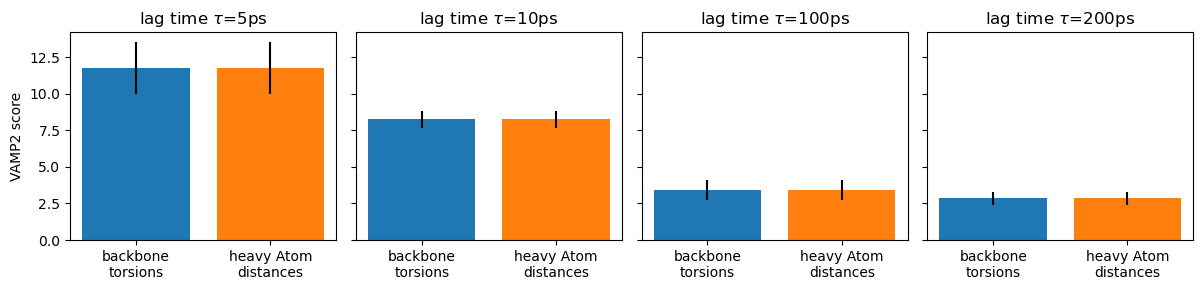

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

labels = ['backbone\ntorsions', 'heavy Atom\ndistances']

tica_estimator = TICA(lagtime=lags[0], dim=dim)

for ax, lag in zip(axes.flat, lags):
    tica_estimator.lagtime = lag
    torsions_scores = vamp_score_cv(tica_estimator, trajs=tot_data, blocksplit=False, n=3)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
#     distances_scores = vamp_score_cv(tica_estimator, trajs=heavy_atom_distances, blocksplit=False, n=3)
#     scores += [distances_scores.mean()]
#     errors += [distances_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C0', 'C1', 'C2'])
    ax.set_title(r'lag time $\tau$={}ps'.format(lag))

axes[0].set_ylabel('VAMP2 score')
fig.tight_layout()

In [69]:
tica_estimator = TICA(lagtime=20, var_cutoff=0.95)
tica = tica_estimator.fit_fetch(tot_data)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/deeptime/util/data.py:424: UserWarning: Skipping trajectory 0: Not enough data (length=11) to satisfy lagtime=20.
  warnings.warn(f"Skipping trajectory {i}: {e}", UserWarning)
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/deeptime/util/data.py:424: UserWarning: Skipping trajectory 1: Not enough data (length=11) to satisfy lagtime=20.
  warnings.warn(f"Skipping trajectory {i}: {e}", UserWarning)
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/deeptime/util/data.py:424: UserWarning: Skipping trajectory 2: Not enough data (length=11) to satisfy lagtime=20.
  warnings.warn(f"Skipping trajectory {i}: {e}", UserWarning)
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/deeptime/util/data.py:424: UserWarning: Skipping trajectory 3: Not enough data (length=11) to satisf

TrajectoryTooShortError: All provided trajectories were too short for the provided lagtime of 20.

In [105]:
tica.output_dimension

17

In [87]:
traj=np.concatenate(tot_data)

In [90]:
np.shape(traj)

(98312, 203)

In [201]:
tica_estimator = TICA(lagtime=1, var_cutoff=0.95)
tica = tica_estimator.fit(tot_data)

In [7]:
out_cont = np.concatenate(tot_data)

In [8]:
np.shape(out_cont)

(98374, 49)

In [19]:
import pyemma.util.contexts

In [11]:

labels = ['backbone\ntorsions']

In [22]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


# dim = 10

# fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
# for ax, lag in zip(axes.flat, [5, 10, 20]):
#     data_scores = score_cv(tot_data, lag=lag, dim=dim)
#     scores = [data_scores.mean()]
#     errors = [data_scores.std()]
# #     positions_scores = score_cv(positions_data, lag=lag, dim=dim)
# #     scores += [positions_scores.mean()]
# #     errors += [positions_scores.std()]
# #     distances_scores = score_cv(distances_data, lag=lag, dim=dim)
# #     scores += [distances_scores.mean()]
# #     errors += [distances_scores.std()]
#     ax.bar(labels, scores, yerr=errors, color=['C0'])
#     ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
#     if lag == 5:
#         # save for later
#         vamp_bars_plot = dict(
#             labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
# axes[0].set_ylabel('VAMP2 score')
# fig.tight_layout()

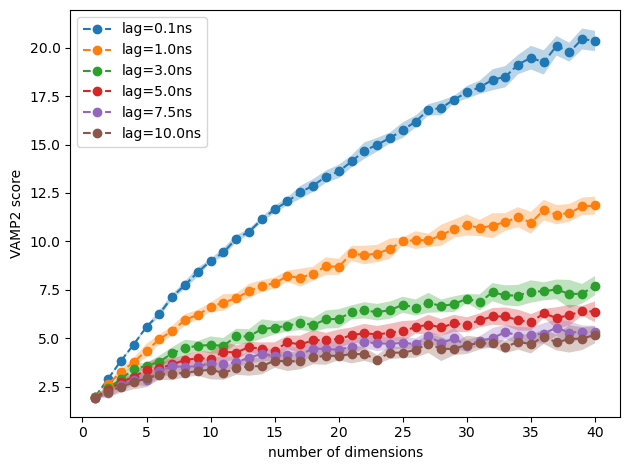

In [39]:
lags = [1, 10, 30, 50, 75, 100 ]
dims = [i + 1 for i in range(40)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(tot_data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()
plt.savefig('lag_vamp.png',dpi=300)

In [77]:
np.shape(tot_data)

(989, 11, 203)

In [94]:
distance_features = np.concatenate(tot_data)

In [95]:
np.shape(distance_features)

(98312, 203)

In [96]:
distance_features

array([[ 0.48988724,  0.6028862 ,  0.670887  , ...,  1.5398865 ,
         1.6718864 ,  1.0888863 ],
       [ 0.25152206,  0.3755226 ,  0.48352242, ...,  0.94052315,
         1.0055218 ,  0.7805233 ],
       [ 0.3697033 ,  0.50170326,  0.62070465, ...,  1.1777039 ,
         1.3077049 ,  0.7977047 ],
       ...,
       [-0.06173849,  0.06326151,  0.2912612 , ...,  0.9072614 ,
         0.8172612 ,  1.0692616 ],
       [-0.11392069,  0.01207924,  0.2400794 , ...,  1.0640793 ,
         0.9900794 ,  1.1640792 ],
       [ 0.0034318 ,  0.11143208,  0.35443163, ...,  1.1274319 ,
         1.0694318 ,  1.3054318 ]], dtype=float32)

In [12]:
tica_dev = pyemma.coordinates.tica(arr6,lag=100, dim=2)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [13]:
tica_dev.dimension()

2

In [14]:
np.shape(tica_concatenated)

(98374, 2)

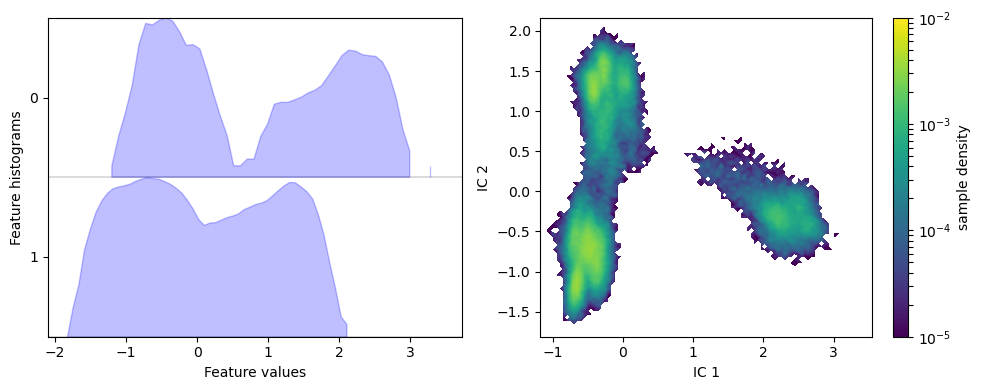

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

In [385]:
np.shape(tica_concatenated)

(98374, 17)

In [320]:
tot_cont = np.concatenate(result)

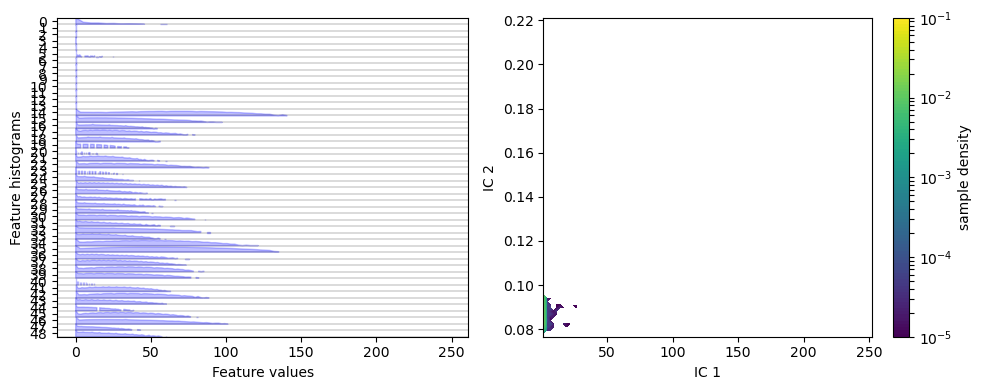

In [321]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tot_cont,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tot_cont[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica2.png')

In [21]:
np.shape(tica_out)

(9,)

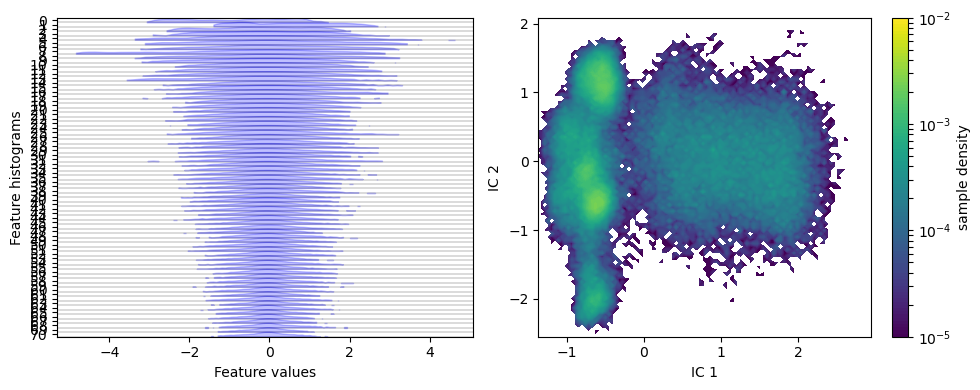

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, [1,2]].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_2_3.png',dpi=300)

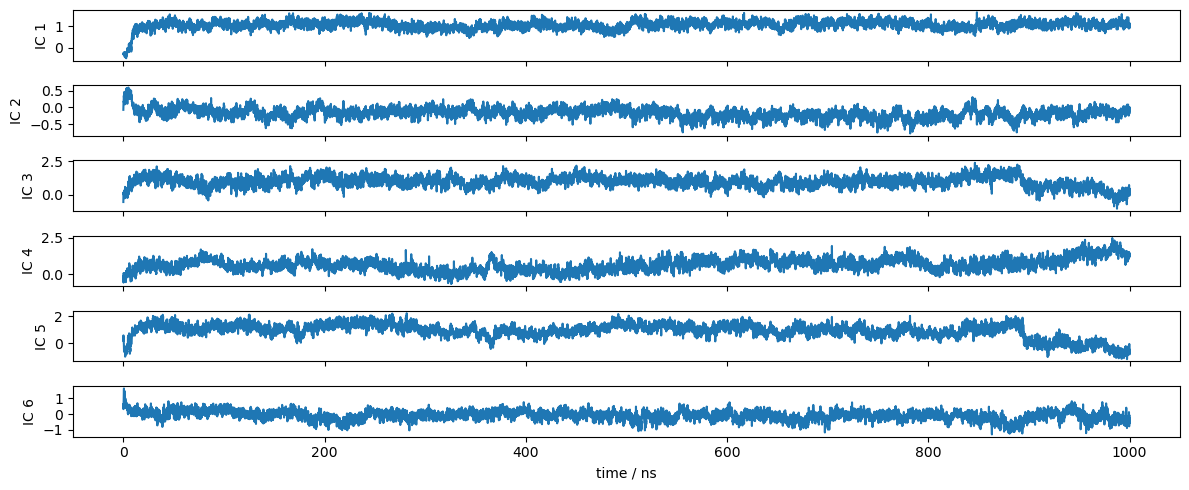

In [151]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_out[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_out[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
# plt.savefig('ics_update.png')

In [111]:
n_clustercenters = [50, 75, 200, 450, 600]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_out, k=k, max_iter=100, stride=1)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, lag=10)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs,n=1,  score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:384: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, (list, tuple, _string_types)) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:388: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, _np.ndarray) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/m

KeyboardInterrupt: 

In [16]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=100, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

In [524]:
data_concatenated = np.concatenate(arr5)

In [522]:
cluster = pyemma.coordinates.cluster_kmeans(arr5, k=75, max_iter=50, stride=10)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|                       | 0/75 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/9 [00:00<?, ?it/s]

estimating BayesianHMSM:   0%|                            | 0/4 [00:00<?, ?it/s]

estimating BayesianHMSM:   0%|                            | 0/4 [00:00<?, ?it/s]

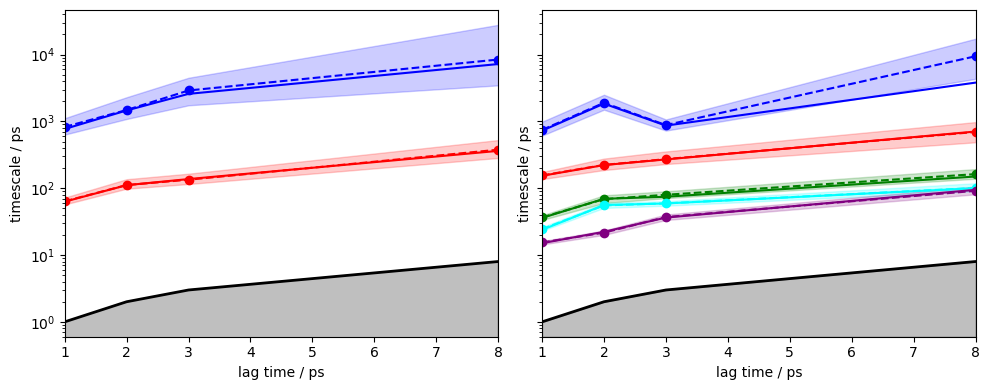

In [563]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 3, lags=[1, 2, 3, 8], errors='bayes', nsamples=50),
    ax=axes[0], units='ps')
pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 6, lags=[1, 2, 3, 8], errors='bayes', nsamples=50),
    ax=axes[1], units='ps')
fig.tight_layout()

Sampling HMSMs:   0%|                                    | 0/50 [00:00<?, ?it/s]

estimating BayesianHMSM:   0%|                            | 0/5 [00:00<?, ?it/s]

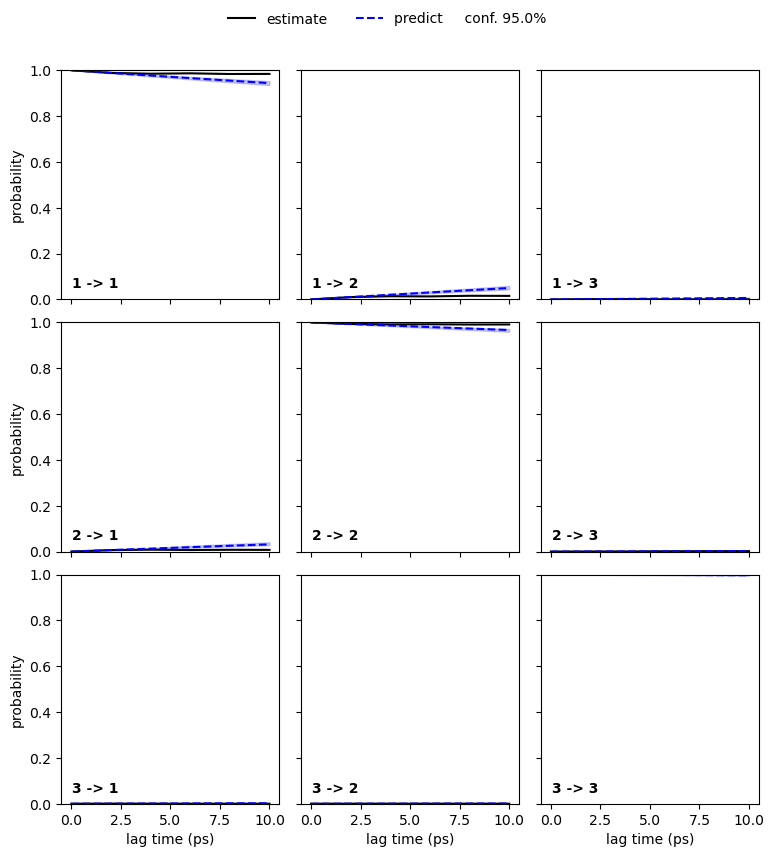

In [568]:
hmm_6 = pyemma.msm.bayesian_hidden_markov_model(cluster.dtrajs, 3, lag=2, dt_traj='1 ps', nsamples=50)
pyemma.plots.plot_cktest(hmm_6.cktest(mlags=6), units='ps');

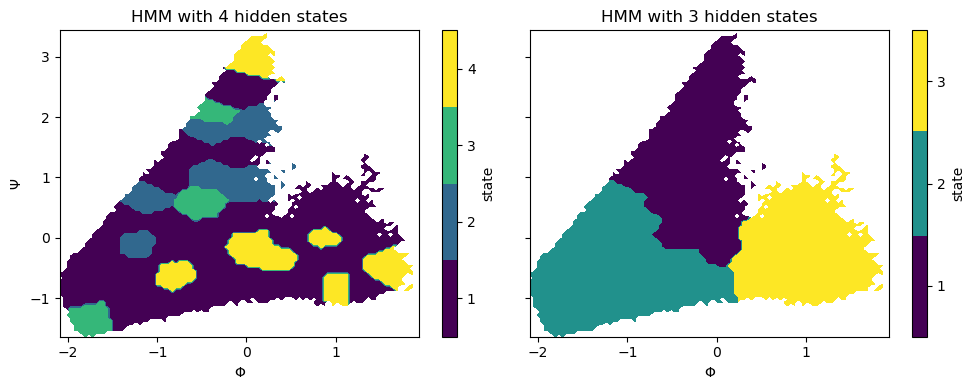

In [569]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for hmm, ax in zip([hmm_4, hmm_6], axes.flat):
    _, _, misc = pyemma.plots.plot_state_map(
        *tica_concatenated[:,:2].T,
        hmm.metastable_assignments[dtrajs_concatenated],
        ax=ax)
    ax.set_title('HMM with {} hidden states'.format(hmm.nstates))
    ax.set_xlabel('$\Phi$')
    misc['cbar'].set_ticklabels(range(1, hmm.nstates + 1))
axes[0].set_ylabel('$\Psi$')
fig.tight_layout()

In [572]:
A = [0]
B = [2]
flux = pyemma.msm.tpt(hmm_6, A, B)

highest_membership = hmm_6.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[hmm_4.observable_set[highest_membership]]

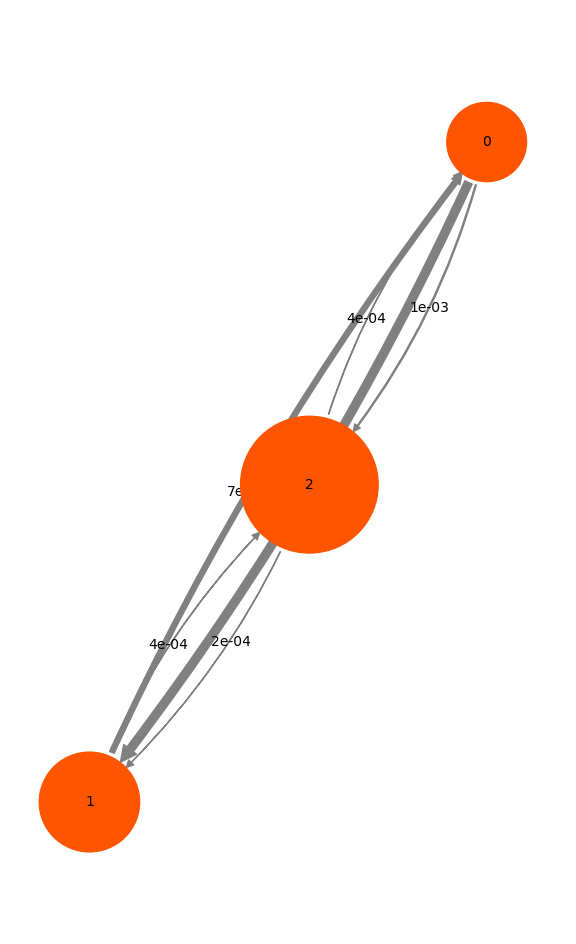

In [576]:
pyemma.plots.plot_markov_model(hmm);

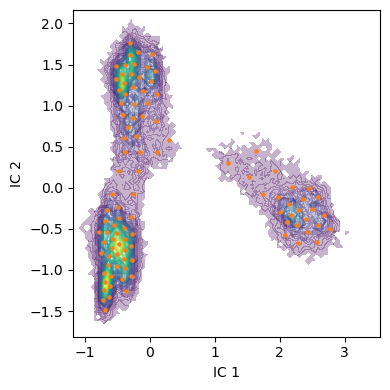

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('cluster_update.png',dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

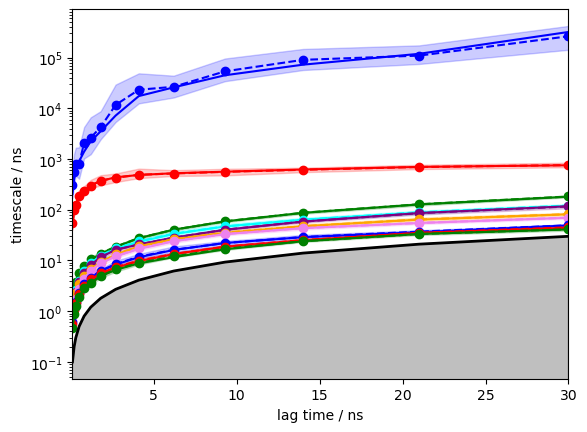

In [18]:
its = pyemma.msm.its(cluster.dtrajs, lags=300, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [14]:
pc_dev = pyemma.coordinates.pca(tot_data, dim=4)

calc mean+cov:   0%|                                      | 0/9 [00:00<?, ?it/s]

In [15]:
pca_out=pc_dev.get_output()

getting output of PCA:   0%|                              | 0/9 [00:00<?, ?it/s]

In [16]:
pca_concatenated = np.concatenate(pca_out)

In [19]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=50, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[61]: compute stat. inefficiencies:   0%|                       …

pyemma.msm.estimators.bayesian_msm.BayesianMSM[61]: Sampling MSMs:   0%|                                      …

fraction of states used = 1.00
fraction of counts used = 1.00


In [482]:
msm

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=200,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=7, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [478]:
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=200, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

fraction of states used = 1.00
fraction of counts used = 1.00


In [488]:
mlmsm = pyemma.msm.MaximumLikelihoodMSM(lag=100) 
# print('fraction of states used = {:.2f}'.format(mlmsm.active_state_fraction))
# print('fraction of counts used = {:.2f}'.format(mlmsm.active_count_fraction))

In [491]:
mlmsm.active_state_fraction

1.0

In [490]:
# Estimate the MSM from the data
mlmsm.fit(dtrajs_concatenated)

# Now you can access the properties of the estimated MSM
print(mlmsm.transition_matrix)  # The estimated transition matrix
print(mlmsm.stationary_distribution)  # The estimated stationary distribution


[[9.47158527e-02 9.84829603e-03 1.01744508e-03 ... 3.78028289e-02
  1.26865551e-02 4.77896694e-02]
 [2.30939979e-03 1.97042933e-01 0.00000000e+00 ... 2.50411325e-03
  0.00000000e+00 1.31100836e-04]
 [9.12863555e-04 0.00000000e+00 1.85461325e-01 ... 9.82741217e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [3.60117395e-02 1.01726883e-02 1.04343182e-02 ... 6.68662677e-02
  0.00000000e+00 5.90894559e-02]
 [6.90016036e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78414838e-01 0.00000000e+00]
 [1.96196601e-02 2.29522300e-04 0.00000000e+00 ... 2.54652324e-02
  0.00000000e+00 6.04770020e-02]]
[0.00932949 0.03978504 0.01039831 0.02625645 0.03517339 0.02941348
 0.02117057 0.03073414 0.01671222 0.03574251 0.01198149 0.00881013
 0.01634931 0.01472926 0.01410603 0.02222459 0.02971263 0.01884329
 0.00822216 0.0103536  0.02132962 0.00857501 0.02256286 0.03320395
 0.01802999 0.00781992 0.01084728 0.02595328 0.02297043 0.01333828
 0.0167947  0.03475144 0.01347775 0.01091452 0.02023508 0.0298350

In [498]:

hmsm = pyemma.msm.estimate_hidden_markov_model(cluster.dtrajs,nstates=3 ,lag=100, dt_traj='0.1 ns')
# print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
# print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

In [503]:
# Define lag time and number of hidden states
lag = 10
n_hidden_states = 4

# Estimate hidden Markov model
hmm = pyemma.msm.estimate_hidden_markov_model(cluster.dtrajs, n_hidden_states, lag)

# Get implied timescales
its = hmm.timescales()

estimating MaximumLikelihoodHMSM:   0%|                  | 0/36 [00:00<?, ?it/s]

IndexError: index 3 is out of bounds for axis 1 with size 3

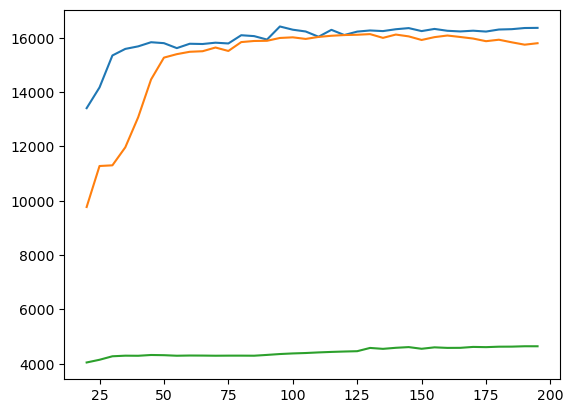

In [519]:
# Define the range of lag times
lags = np.arange(20, 200, 5)

# Calculate the implied timescales for each lag time
its = pyemma.msm.timescales_hmsm(cluster.dtrajs, n_hidden_states, lags=lags)

# Get the timescales as an array
its_array = its.get_timescales()

# Plot the results
fig, ax = plt.subplots()
for i in range(n_hidden_states):
    ax.plot(lags, its_array[:, i], label='State {}'.format(i+1))
ax.set_xlabel('Lag time')
ax.set_ylabel('Implied timescales')
ax.legend()
plt.grid()
plt.show()

estimating BayesianHMSM:   0%|                            | 0/4 [00:00<?, ?it/s]

estimating BayesianHMSM:   0%|                            | 0/4 [00:00<?, ?it/s]

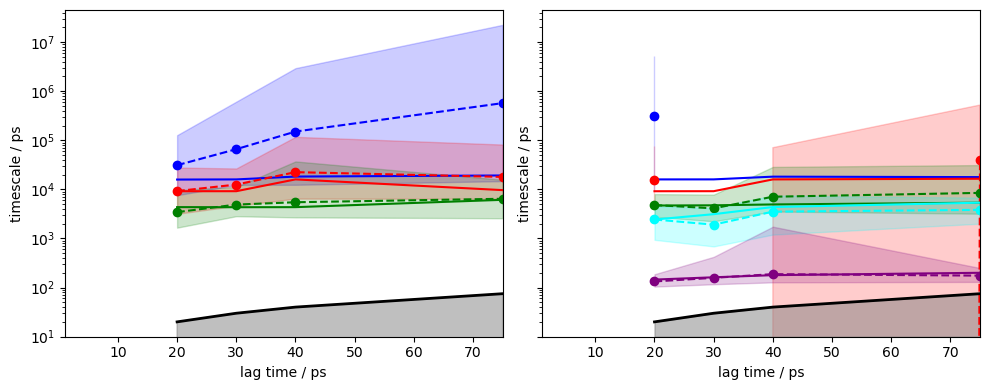

In [520]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 4, lags=[20, 30, 40, 75], errors='bayes', nsamples=50),
    ax=axes[0], units='ps')
pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 6, lags=[20, 30, 40, 75], errors='bayes', nsamples=50),
    ax=axes[1], units='ps')
fig.tight_layout()

In [499]:
hmsm

MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='0.1 ns',
           lag=100, maxit=1000, mincount_connectivity=0.3333333333333333,
           msm_init='largest-strong', nstates=3, observe_nonempty=True,
           reversible=True, separate=None, stationary=False, stride=1)

In [124]:
import pyemma.msm as msm2

In [129]:
import pyemma.plots as mplt2

In [126]:
msm_obj = msm2.estimate_markov_model(cluster.dtrajs, lag=100)

In [127]:
print(msm)

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=100,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=8, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)


In [128]:
print(msm_obj)

MaximumLikelihoodMSM(connectivity='largest', core_set=None,
           count_mode='sliding', dt_traj='1 step', lag=100, maxerr=1e-08,
           maxiter=1000000, milestoning_method='last_core',
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None)


In [135]:
print(np.shape(msm_obj.transition_matrix))

(75, 75)


In [36]:
mplt2.plot_network(msm_obj.transition_matrix)

NameError: name 'mplt2' is not defined

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 10 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


ValueError: 'x' and 'y' must have the same size

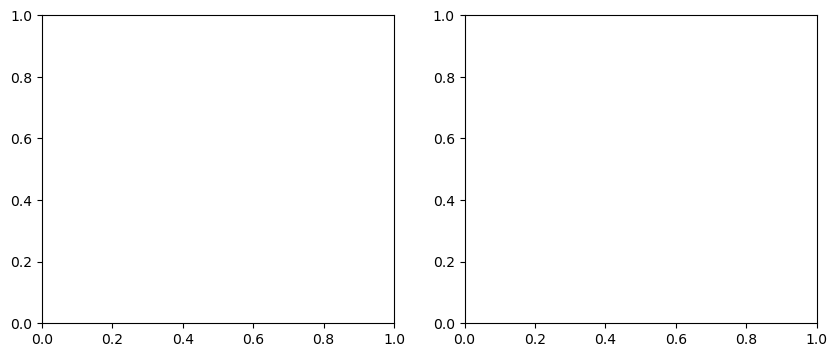

In [637]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                             | 0/9 [00:00<?, ?it/s]

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 7 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


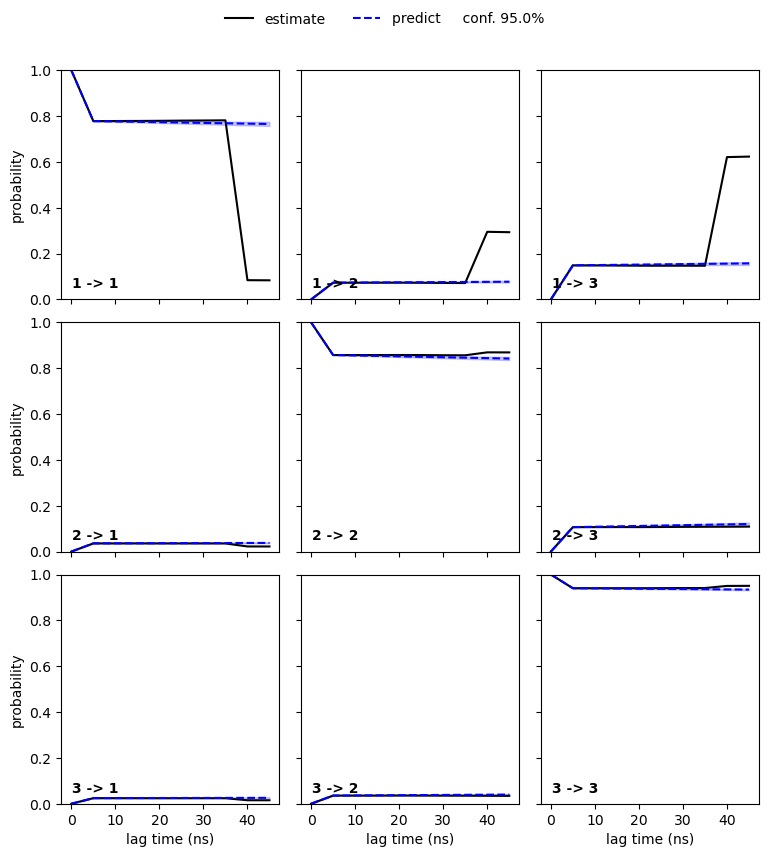

In [638]:
nstates = 3
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

In [141]:
msm.cktest

<bound method _MSMEstimator.cktest of BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=30,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=7, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)>

The first eigenvector is one: True (min=0.9999999999917037, max=1.000000000002121)


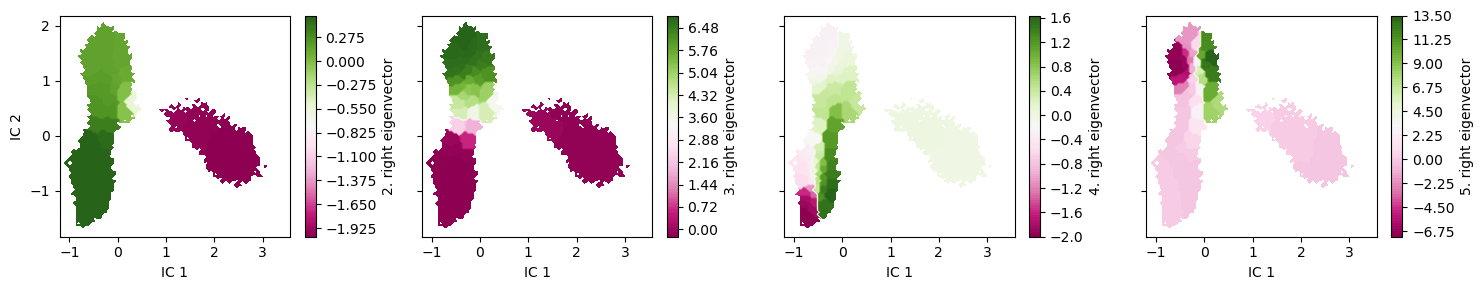

In [20]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('righ_eigen.png',dpi=300)

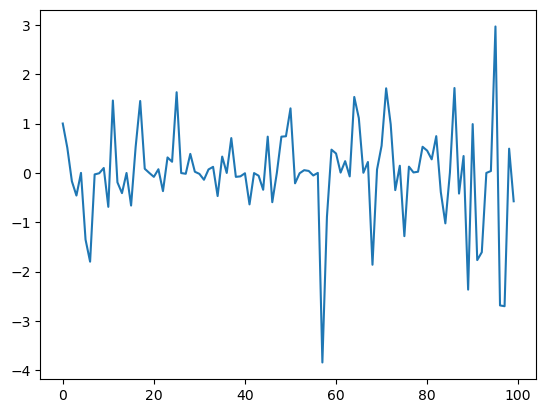

In [21]:
plt.plot(eigvec[40])

In [171]:
eigvec

array([[ 1.00000000e+00, -3.18180402e+00,  1.14436993e+00, ...,
         1.84986306e+00,  4.39674296e-01,  4.90075661e-02],
       [ 1.00000000e+00, -6.99086032e+00, -1.63608379e-01, ...,
        -1.55110301e+01,  1.08970300e+00, -1.36935435e-01],
       [ 1.00000000e+00,  4.49185520e-02,  2.44008460e+00, ...,
         7.62182165e-04, -1.49248980e-03, -2.13879344e-02],
       ...,
       [ 1.00000000e+00, -7.66699944e+00, -8.58308831e-02, ...,
         3.53913555e-01,  2.77550608e+00, -1.29870459e-01],
       [ 1.00000000e+00,  1.15357812e-01, -3.96707557e-01, ...,
        -1.01440170e-02, -2.44859222e-02, -1.71470972e+00],
       [ 1.00000000e+00,  4.39136468e-02,  2.42009697e+00, ...,
        -1.82592447e-03, -1.16281214e-03, -4.84281404e-02]])

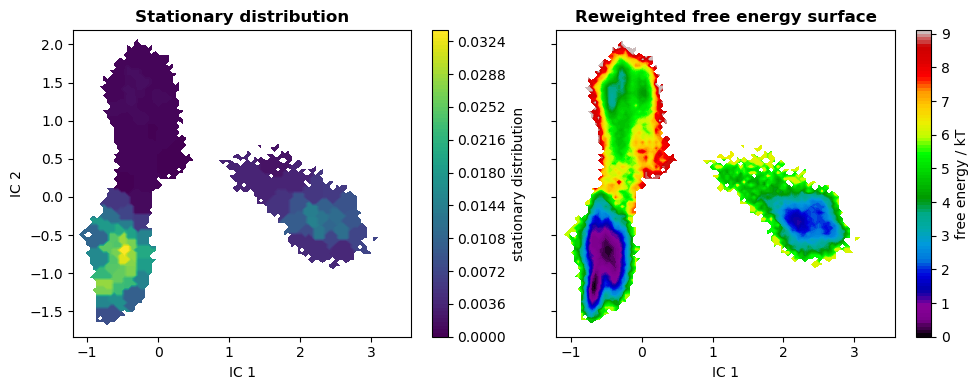

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

In [24]:
pcca_obj = msm.pcca(3)

msm_assignments = msm.metastable_assignments

pcca=msm.pcca(3)

In [25]:
T = msm.transition_matrix

In [26]:
np.shape(T)

(100, 100)

In [27]:
K = T[[0, 1, 2]][:, [0, 1, 2]]

# print the transition probabilities between the 4 metastable states
print("Transition probabilities between the 4 metastable states:")
print(K)

Transition probabilities between the 4 metastable states:
[[0.16077537 0.         0.        ]
 [0.         0.10973937 0.        ]
 [0.         0.         0.13160622]]


In [28]:
N = pcca.coarse_grained_transition_matrix

In [29]:
N

array([[9.90377193e-01, 1.32968579e-03, 8.29312146e-03],
       [1.65263981e-04, 9.99801278e-01, 3.34576836e-05],
       [2.68159230e-04, 8.03830150e-06, 9.99723802e-01]])

In [30]:
S = N[[0, 1, 2]][:, [0, 1,2 ]]

# print the transition probabilities between the 4 metastable states
print("Transition probabilities between the 4 metastable states:")
print(S)

Transition probabilities between the 4 metastable states:
[[9.90377193e-01 1.32968579e-03 8.29312146e-03]
 [1.65263981e-04 9.99801278e-01 3.34576836e-05]
 [2.68159230e-04 8.03830150e-06 9.99723802e-01]]


In [142]:
np.shape(N)

(4, 4)

In [32]:
membership = pcca.memberships

In [33]:
pcca.metastable_assignment

array([0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0])

In [34]:
prob = pcca.output_probabilities


In [35]:
np.shape(prob)

(3, 100)

In [36]:
pcca_prob = np.sum(prob, axis=0)

In [37]:
np.shape(pcca_prob)

(100,)

In [38]:
K = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        if i != j:
            K[i, j] = np.sum(T[membership[:, i] > 0, j]) / pcca_prob[i]

In [39]:
K

array([[ 0.        , 55.75660867, 70.51203715],
       [35.1675189 ,  0.        , 39.94389437],
       [17.58578124, 15.79441081,  0.        ]])

In [40]:
K /= np.sum(K, axis=1)[:, np.newaxis]

# print the transition matrix
print(K)

[[0.         0.44157129 0.55842871]
 [0.46820473 0.         0.53179527]
 [0.52683284 0.47316716 0.        ]]


ValueError: different number of values and points

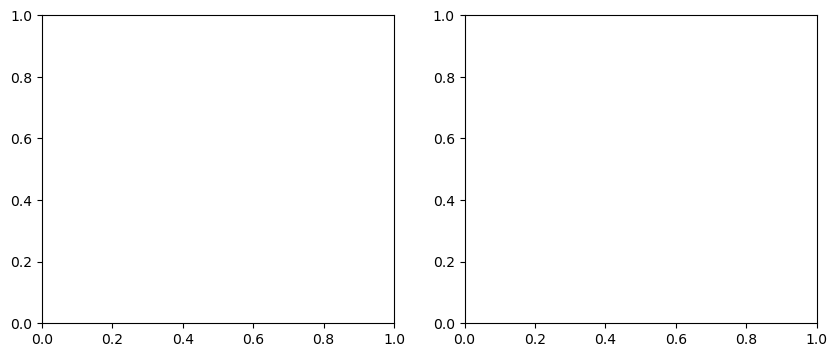

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T, msm.metastable_distributions[i][cluster.dtrajs[0]], ax=ax, cmap='afmhot_r',
        mask=True, method='nearest', cbar_label='metastable distribution {}'.format(i + 1))
    ax.scatter(*cluster.clustercenters.T, s=15, c='k')
    ax.set_xlabel('$x$')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
axes[0].set_ylabel('$y$')
fig.tight_layout()

In [42]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

NameError: name 'nstates' is not defined

In [43]:
nstates = 3
msm.pcca(nstates)
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm.pi[s].sum()))

π_1 = 0.024924
π_2 = 0.198788
π_3 = 0.776287


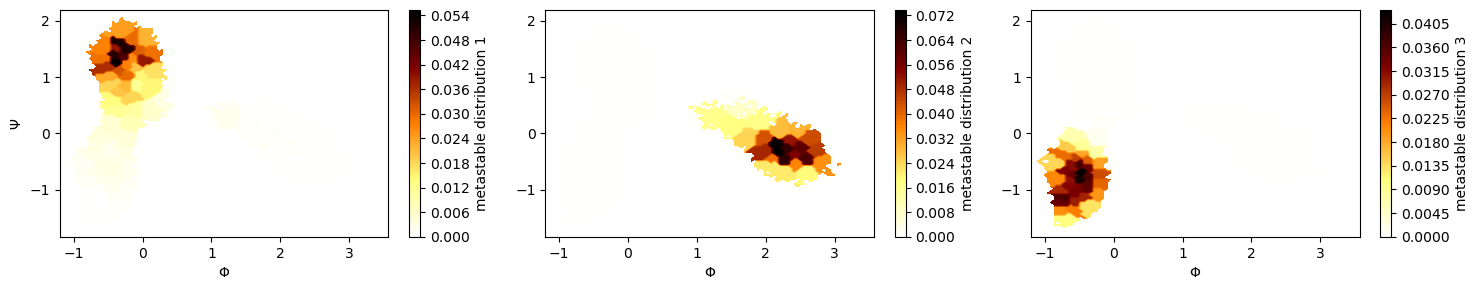

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('$\Phi$')
axes[0].set_ylabel('$\Psi$')
fig.tight_layout()
# plt.savefig('meta_update.png',dpi=300)

In [45]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [46]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

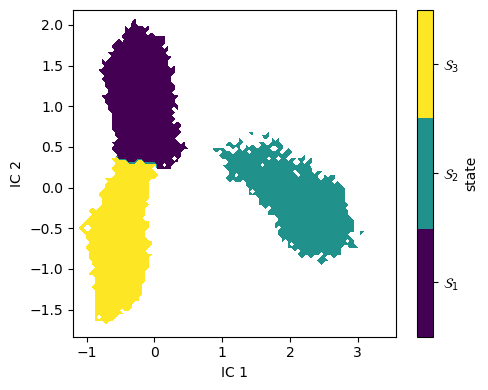

In [47]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

In [137]:
(msm.metastable_assignments)

array([1, 1, 2, 1, 3, 1, 0, 0, 2, 1, 1, 3, 1, 0, 1, 3, 0, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 3, 0, 3, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 3, 1,
       1, 3, 0, 1, 3, 1])

In [167]:
n_macrostates = 4  # or however many macrostates you have
mapping = {0: 3, 1: 2, 2: 0, 3: 1}  # map old states to new states

# Create a new assignment of microstates to macrostates
new_assignment = np.zeros_like(msm.metastable_assignments)
for i in range(n_macrostates):
    new_assignment[msm.metastable_assignments == i] = mapping[i]

# Replace the old assignments with the new ones
# msm.metastable_assignments = new_assignment

In [168]:
new_assignment

array([2, 2, 0, 2, 1, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 0, 2,
       2, 3, 3, 0, 2, 0, 1, 3, 1, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 1, 2,
       2, 1, 3, 2, 1, 2])

In [295]:
metastable_traj = new_assignment[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

IndexError: index 90 is out of bounds for axis 0 with size 50

In [175]:
# Compute MFPTs between all pairs of new PCCA+ states
mfpts = np.zeros((len(mapping), len(mapping)))
for i in range(len(mapping)):
    for j in range(len(mapping)):
        if i != j:
            mfpts[i, j] = msm.mfpt(
                msm.metastable_sets[new_assignment[i]],
                msm.metastable_sets[new_assignment[j]]
            )

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.00,3052.39,14737.84,15530.90
2,8386.13,0.00,14785.08,15717.90
3,35704.46,28478.26,0.00,1306.85
4,36127.29,29109.63,922.48,0.00


In [174]:
mfpts

array([[    0.        ,     0.        , 35704.45588857,     0.        ],
       [    0.        ,     0.        , 35704.45588857,     0.        ],
       [14737.84140019, 14737.84140019,     0.        , 14737.84140019],
       [    0.        ,     0.        , 35704.45588857,     0.        ]])

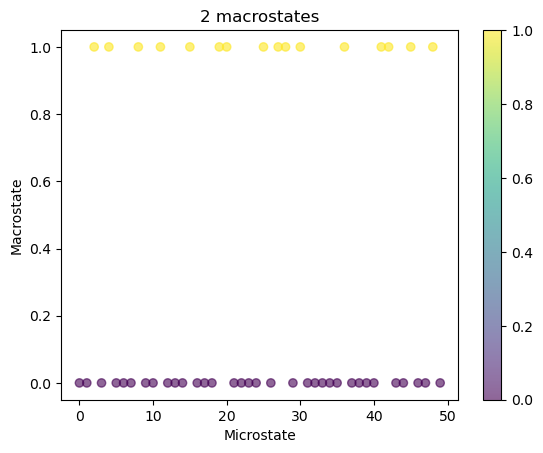

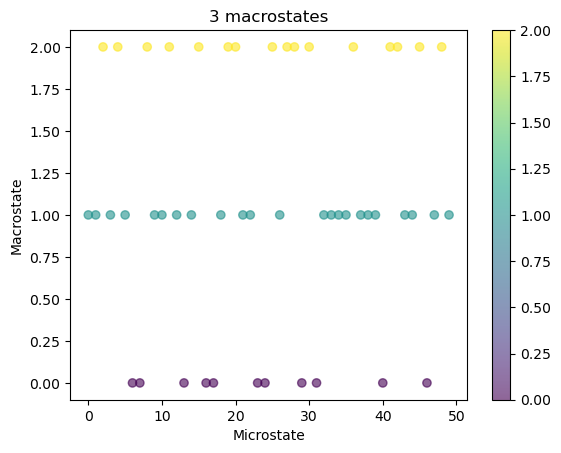

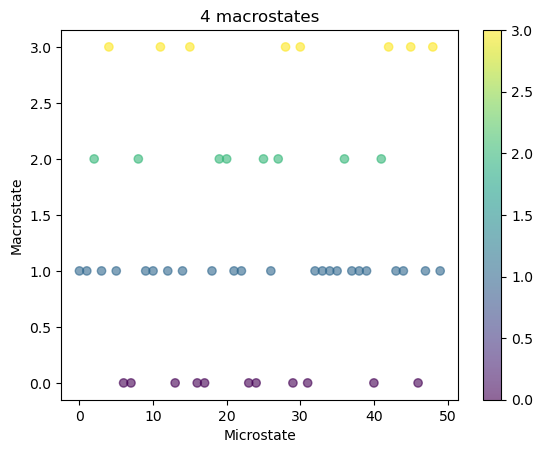

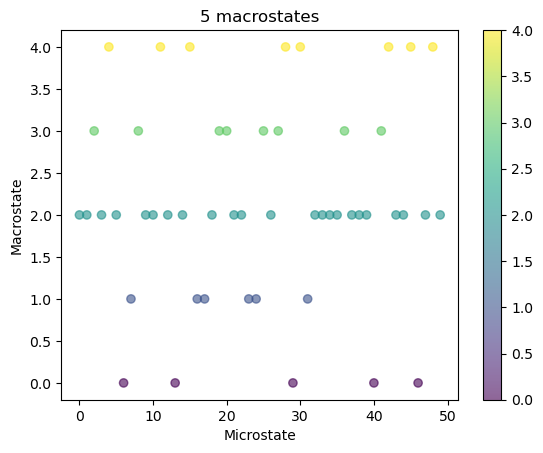

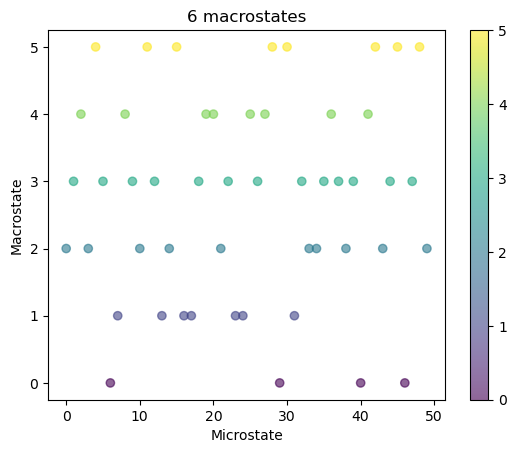

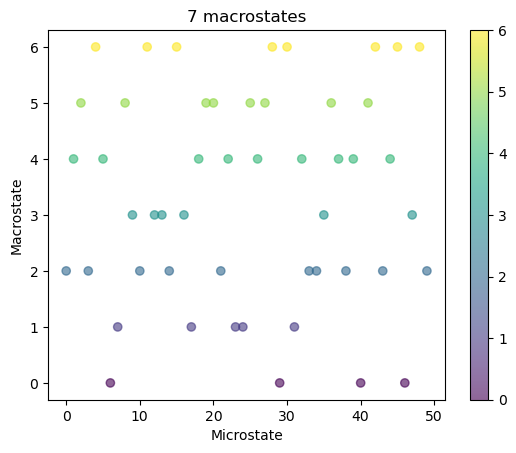

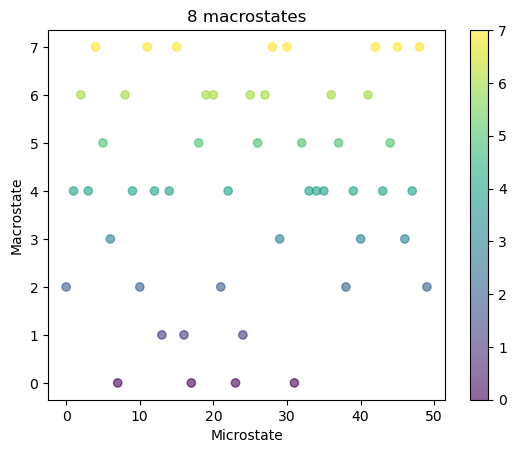

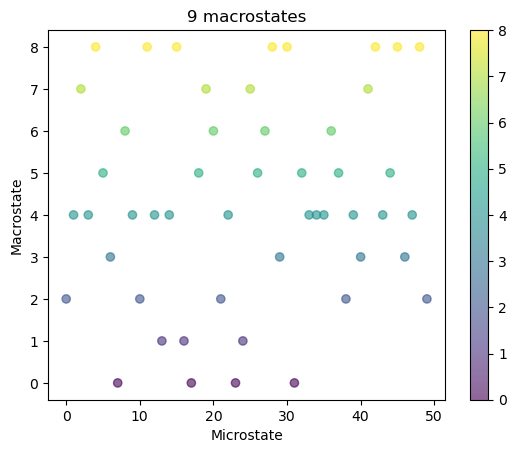

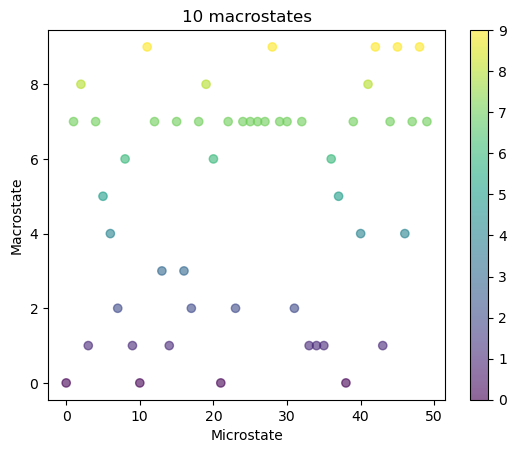

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Run PCCA+ for different numbers of macrostates
n_macrostates = range(2, 11)  # for example
assignments = []

for n in n_macrostates:
    msm.pcca(n)
    assignments.append(msm.metastable_assignments)

# Create a plot for each number of macrostates
for i, n in enumerate(n_macrostates):
    plt.figure(i)
    plt.scatter(range(len(assignments[i])), assignments[i], c=assignments[i], cmap='viridis', alpha=0.6)
    plt.title(f'{n} macrostates')
    plt.xlabel('Microstate')
    plt.ylabel('Macrostate')
    plt.colorbar()

plt.show()


In [48]:
# Assume msm is your MarkovStateModel object
stationary_distribution = msm.stationary_distribution


In [338]:
# Transition matrix of your MSM
transition_matrix = msm.transition_matrix


In [341]:
np.shape(transition_matrix)

(100, 100)

In [1]:
P_AB = np.sum(transition_matrix[A][:, B])


NameError: name 'np' is not defined

In [335]:
tlist=['../trajdat/dat2/rep1_tot.xtc','../trajdat/dat2/rep2_tot.xtc','../trajdat/dat2/rep3_tot.xtc',\
       '../trajdat/dat2/rep4.xtc','../trajdat/dat2/rep6_tot2.xtc','../trajdat/dat/1_tot.xtc','../trajdat/dat/3_tot.xtc',\
        '../trajdat/dat/5_tot.xtc','../trajdat/dat/9_tot.xtc']

In [123]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(tlist, top='../trajdat/dat/gro.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./in{}_tor.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

['./in1_tor.gro', './in2_tor.gro', './in3_tor.gro', './in4_tor.gro']

In [49]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)

In [54]:
pcca_samples

array([array([[   1, 6418],
              [   1, 6941],
              [   5, 1806],
              [   8, 4384],
              [   6, 1309],
              [   6, 1790],
              [   1, 3287],
              [   0, 5128],
              [   8, 3006],
              [   2, 1853]]), array([[    4,  4072],
                                     [    4,  2440],
                                     [    4,  5905],
                                     [    4,  1400],
                                     [    4,  8389],
                                     [    4,  8044],
                                     [    4, 12190],
                                     [    4,  6872],
                                     [    4,  3411],
                                     [    4,  9629]]),
       array([[    2,  6585],
              [    5,  9698],
              [    8,  7026],
              [    0,  2498],
              [    3,   658],
              [    8, 12291],
              [    0,  8580],
      

In [53]:
np.shape(pcca_samples[1])

(10, 2)

In [343]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(tlist, top='../trajdat/dat/gro.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./in{}_tor.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

['./in1_tor.gro', './in2_tor.gro', './in3_tor.gro']

In [182]:
msm.metastable_assignments

array([1, 1, 2, 1, 3, 1, 0, 0, 2, 1, 1, 3, 1, 0, 1, 3, 0, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 3, 0, 3, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 3, 1,
       1, 3, 0, 1, 3, 1])

In [195]:
np.sum(msm.metastable_distributions)

4.0

In [197]:
# Create a new metastable distributions array
new_distributions = np.zeros((len(mapping), msm.nstates))

# Compute the metastable distributions for each new metastable state
for i in range(len(mapping)):
    # Get the microstate indices that belong to this metastable state
    microstate_indices = np.where(np.array(new_assignment) == i)[0]
    
    # Assign the stationary probabilities of these microstates
    new_distributions[i, microstate_indices] = msm.stationary_distribution[microstate_indices]
    
    # Normalize the distribution so it sums to 1
    new_distributions[i] /= new_distributions[i].sum()

# new_distributions is now the metastable distributions for the new metastable states

In [198]:
pcca_samples = msm.sample_by_distributions(new_distributions, 10)
torsions_source = pyemma.coordinates.source(tlist, top='../trajdat/dat/gro.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./in{}_tor.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

['./in1_tor.gro', './in2_tor.gro', './in3_tor.gro', './in4_tor.gro']

In [161]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.00,2176.53,4078.25,1648.34
2,205260.13,0.00,3830.17,1079.79
3,275415.15,71841.61,0.00,789.64
4,275850.78,72070.81,4223.50,0.00


In [171]:
new_assignment

array([2, 2, 0, 2, 1, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 0, 2,
       2, 3, 3, 0, 2, 0, 1, 3, 1, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 1, 2,
       2, 1, 3, 2, 1, 2])

In [161]:
msm.metastable_sets

[array([ 0, 10, 21, 38]),
 array([ 3,  9, 14, 33, 34, 35, 43]),
 array([ 7, 17, 23, 31]),
 array([13, 16]),
 array([ 6, 40, 46]),
 array([ 5, 37]),
 array([ 8, 20, 36]),
 array([ 1,  4, 12, 15, 18, 22, 24, 25, 26, 27, 29, 30, 32, 39, 44, 47, 49]),
 array([ 2, 19, 41]),
 array([11, 28, 42, 45, 48])]

In [162]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.025033	3.687553
2	0.046672	3.064608
3	0.024694	3.701202
4	0.020535	3.885602
5	0.024601	3.704963
6	0.058678	2.835690
7	0.140326	1.963789
8	0.258541	1.352703
9	0.159541	1.835453
10	0.241379	1.421388


In [159]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(new_assignments):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT


NameError: name 'new_assignments' is not defined

In [96]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

MFPT 1 -> other: ( 354.1 ±  54.0) ns
MFPT other -> 1: (32630.1 ± 9760.7) ns


In [154]:
start, final = 0, 3
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

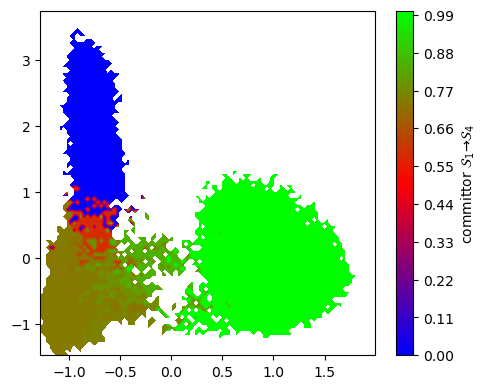

In [155]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap='brg',
    ax=ax,
    mask=True,
    cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (
        start + 1, final + 1))
fig.tight_layout()
plt.savefig('commitor_update.png',dpi=300)

In [93]:
msm


BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=100,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=7, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [95]:
# get the transition matrix
T = msm.transition_matrix

# print the transition matrix
# print(T)

In [96]:
print(T)

[[3.60060516e-01 1.13017718e-02 1.63011538e-02 ... 1.20722381e-01
  5.70528534e-03 8.52577364e-02]
 [8.72248841e-04 2.57545883e-01 0.00000000e+00 ... 4.19630415e-03
  0.00000000e+00 0.00000000e+00]
 [1.25473374e-04 0.00000000e+00 3.22533135e-01 ... 0.00000000e+00
  0.00000000e+00 1.81274864e-01]
 ...
 [5.64365324e-02 2.54182486e-02 0.00000000e+00 ... 3.08367073e-01
  2.01092298e-03 6.65309833e-04]
 [1.54183157e-05 0.00000000e+00 0.00000000e+00 ... 1.16247191e-05
  1.20314389e-01 0.00000000e+00]
 [5.10284201e-04 0.00000000e+00 1.40955713e-01 ... 8.51784507e-06
  0.00000000e+00 4.29338101e-01]]


In [94]:
msm.

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=100,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=7, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [145]:
nstates = 4
msm.pcca(nstates)
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm.pi[s].sum()))

π_1 = 0.002752
π_2 = 0.009335
π_3 = 0.150822
π_4 = 0.837091


In [146]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [147]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

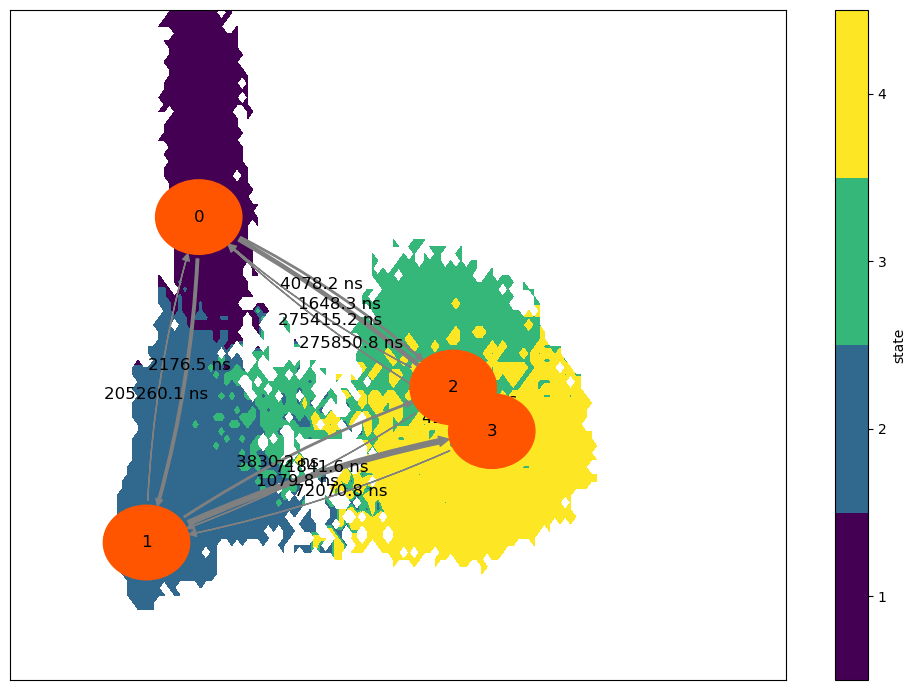

In [152]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f ns',
    arrow_labels=mfpt,
    size=12,
    show_frame=True,
    ax=ax)

# ax.set_xlabel('$\Phi$')
# ax.set_ylabel('$\Psi$')
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
fig.tight_layout()

In [153]:
A = msm.metastable_sets[0]
B = msm.metastable_sets[3]
flux = pyemma.msm.tpt(msm, A, B)

In [156]:
cg, cgflux = flux.coarse_grain(msm.metastable_sets)

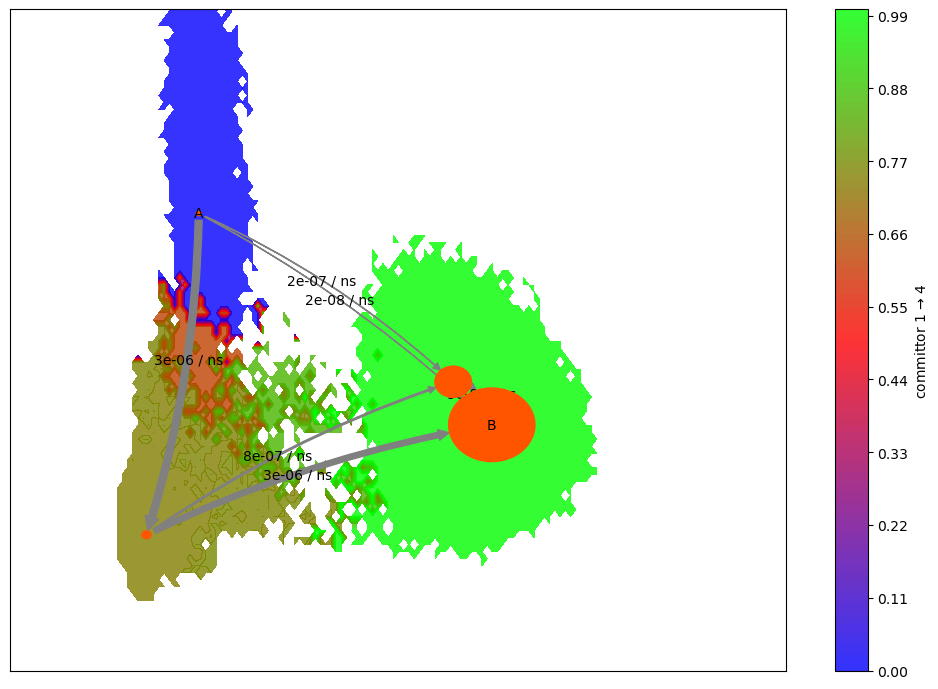

In [159]:
fig, ax = plt.subplots(figsize=(10, 7))

pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap='brg',
    ax=ax,
    mask=True,
    cbar_label=r'committor 1 $\to$ 4',
    alpha=0.8,
    zorder=-1);

pyemma.plots.plot_flux(
    cgflux,
    coarse_state_centers,
    cgflux.stationary_distribution,
    state_labels=['A','' ,'', 'B'],
    ax=ax,
    show_committor=False,
    figpadding=0,
    show_frame=True,
    arrow_label_format='%2.e / ns');

# ax.set_xlabel('$\Phi$')
# ax.set_ylabel('$\Psi$')
ax.set_xlim(-2,3)
ax.set_ylim(-2,3)
fig.tight_layout()
plt.savefig('committor.png',dpi=300)

In [158]:
paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print(np.round(path_fluxes[i] / np.sum(path_fluxes), 3),' \t', paths[i] + 1)

percentage       	path
-------------------------------------
0.745  	 [1 2 4]
0.212  	 [1 2 3 4]
0.043  	 [1 3 4]


In [344]:
# Assume msm is your MarkovStateModel object
stationary_distribution = msm.stationary_distribution
# Transition matrix of your MSM
transition_matrix = msm.transition_matrix


In [366]:
A = [1]
B = [20]


In [367]:
P_AB = np.sum(transition_matrix[A][:, B])


In [368]:
P_AB

0.017935465802923378

In [369]:
pi_A = stationary_distribution[A]


In [370]:
pi_A

array([0.00021679])

In [371]:
F_AB = np.sum(pi_A * P_AB)


In [372]:
F_AB

3.888281282131186e-06

In [373]:
MFPT_AB = 1 / F_AB


In [374]:
MFPT_AB

257183.03986791178

In [350]:
import numpy as np
from scipy.linalg import solve

def compute_mfpt(P, i, j):
    n = len(P)
    Q = np.copy(P)
    np.fill_diagonal(Q, 0)

    for k in range(n):
        Q[k, k] = -Q[k, :].sum()
    Q[j, :] = 0
    Q[j, j] = 1

    b = np.zeros(n)
    b[j] = 1

    x = solve(Q, b)

    return x[i]

# then use this function to calculate MFPT from state i to state j
# mfpt_ij = compute_mfpt(P, i, j)


In [ ]:
mfpt_ij = compute_mfpt(P, i, j)